In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("train.csv")
df.head()

,text,sentiment
0,"oh Marly, I`m so sorry!! I hope you find her...",neutral
1,Playing Ghost Online is really interesting. Th...,positive
2,is cleaning the house for her family who is co...,neutral
3,gotta restart my computer .. I thought Win7 wa...,neutral
4,SEe waT I Mean bOuT FoLL0w fRiiDaYs... It`S cA...,neutral


In [5]:
df.shape

(27448, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27448 entries, 0 to 27447
Data columns (total 2 columns):
text         27447 non-null object
sentiment    27448 non-null object
dtypes: object(2)
memory usage: 429.0+ KB


In [7]:
df.dropna(axis = 0,inplace = True)
df.shape

(27447, 2)

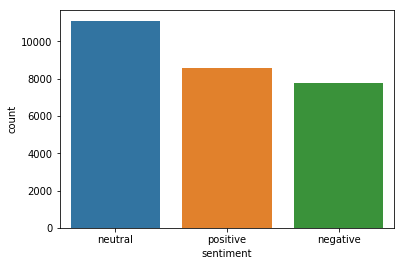

In [8]:
sns.countplot(df['sentiment'])

In [9]:
#removal of stop words
import nltk #nlp library
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words("english")
df['text'] = df['text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
df.head()

,text,sentiment
0,"oh Marly, I`m sorry!! I hope find soon!! <3 <3",neutral
1,Playing Ghost Online really interesting. The n...,positive
2,cleaning house family comming later today..,neutral
3,gotta restart computer .. I thought Win7 suppo...,neutral
4,SEe waT I Mean bOuT FoLL0w fRiiDaYs... It`S cA...,neutral


In [11]:
#Stemming
from nltk.stem import PorterStemmer
#nltk.download('punkt')
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))
#df.head()

In [12]:

#Lemmatization
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
lemma = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x : ' '.join([lemma.lemmatize(word) for word in x.split()]))

In [13]:
#removing punctuation
import re
def remove_punct(text):
    text = re.sub('http://[A-Za-z0-9./]+','',text) #removes any https links
    text = re.sub('[0-9]', '',text) #removes numbers
    text = re.sub("[^a-zA-Z0-9]", " ",text) #removes special characters
    return text
df['text'] = df['text'].apply(remove_punct)

In [14]:
from textblob import TextBlob
df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0          oh mary  i m sorry   I hope find soon      
1    play ghost online really interesting  the new ...
2                   clean you family com later today  
3    gutta start compute    I thought win support p...
4    see wat I mean bout follow friday    it  call ...
Name: text, dtype: object

In [15]:
df['text'] = df['text'].apply(lambda x: " ".join([word.upper() for word in x.split()]))
df['text'].head()

0                  OH MARLY I M SORRY I HOPE FIND SOON
1    PLAY GHOST ONLIN REALLI INTERESTING THE NEW UP...
2                     CLEAN HOU FAMILI COM LATER TODAY
3    GOTTA RESTART COMPUT I THOUGHT WIN SUPPO PUT E...
4    SEE WAT I MEAN BOUT FOLLW FRIIDAYS IT CALL LOS...
Name: text, dtype: object

In [16]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
def token(text):
    return tknzr.tokenize(text)
df['tokenized'] = df['text'].apply(token) 
df.head()

,text,sentiment,tokenized
0,OH MARLY I M SORRY I HOPE FIND SOON,neutral,"[OH, MARLY, I, M, SORRY, I, HOPE, FIND, SOON]"
1,PLAY GHOST ONLIN REALLI INTERESTING THE NEW UP...,positive,"[PLAY, GHOST, ONLIN, REALLI, INTERESTING, THE,..."
2,CLEAN HOU FAMILI COM LATER TODAY,neutral,"[CLEAN, HOU, FAMILI, COM, LATER, TODAY]"
3,GOTTA RESTART COMPUT I THOUGHT WIN SUPPO PUT E...,neutral,"[GOTTA, RESTART, COMPUT, I, THOUGHT, WIN, SUPP..."
4,SEE WAT I MEAN BOUT FOLLW FRIIDAYS IT CALL LOS...,neutral,"[SEE, WAT, I, MEAN, BOUT, FOLLW, FRIIDAYS, IT,..."


In [17]:

#label encoding
df['sentiment'] = df['sentiment'].map({'neutral':0,'positive':1,'negative':2})

In [44]:
#With Tfidftransformer we can systematically compute word counts using CountVectorizer and then compute the Tf-idf scores followed by IDF values.
#With Tfidfvectorizer it computes the word counts, IDF values, and Tf-idf scores all 3 using the same dataset.

from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=379, max_df=0.7)  
x = tfidfconverter.fit_transform(df['text']).toarray() #this is x(used to train the model)that has text converted to vectors


In [45]:
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

y = df['sentiment']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter = 1000000)
#scores = cross_val_score(lr, x_train,y_train, cv=10)
logreg = lr.fit(x_train,y_train)
prediction = logreg.predict(x_test)
metrics.accuracy_score(y_test,prediction)

0.6608378870673952

In [47]:
metrics.confusion_matrix(y_test, prediction)

array([[1698,  262,  287],
       [ 505, 1189,   79],
       [ 633,   96,  741]], dtype=int64)

In [48]:

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67      2247
           1       0.77      0.67      0.72      1773
           2       0.67      0.50      0.58      1470

    accuracy                           0.66      5490
   macro avg       0.68      0.64      0.65      5490
weighted avg       0.67      0.66      0.66      5490



In [23]:
vds = pd.read_csv("USA Election 2020-tweets.csv")
vds.head()

,Unnamed: 0,Datetime,Tweet Id,Text
0,0,2020-06-22 18:59:35,1275141399638310914,RT @realDonaldTrump: RIGGED 2020 ELECTION: MIL...
1,1,2020-06-22 18:58:17,1275141071316619270,RT @realDonaldTrump: Barr: Mail-in Ballots ‘Ab...
2,2,2020-06-22 18:58:00,1275141003050135553,RT @realDonaldTrump: RIGGED 2020 ELECTION: MIL...
3,3,2020-06-22 18:57:00,1275140748401401859,RT @realDonaldTrump: Because of MAIL-IN BALLOT...
4,4,2020-06-22 18:54:42,1275140171483226115,RT @ekww11: OKLAHOMA ⛅⚡\n\nPrimary Election 🇺🇸...


In [24]:
vds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Unnamed: 0    200 non-null int64
Datetime      200 non-null object
Tweet Id      200 non-null int64
Text          200 non-null object
dtypes: int64(2), object(2)
memory usage: 6.4+ KB


In [25]:
vds.shape

(200, 4)

In [26]:
vds.dropna(axis = 0,inplace = True)
vds.shape

(200, 4)

In [28]:

#removal of stop words
import nltk #nlp library
from nltk.corpus import stopwords
stop = stopwords.words("english")
vds['Text'] = vds['Text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
vds.head()

,Unnamed: 0,Datetime,Tweet Id,Text
0,0,2020-06-22 18:59:35,1275141399638310914,RT @realDonaldTrump: RIGGED 2020 ELECTION: MIL...
1,1,2020-06-22 18:58:17,1275141071316619270,RT @realDonaldTrump: Barr: Mail-in Ballots ‘Ab...
2,2,2020-06-22 18:58:00,1275141003050135553,RT @realDonaldTrump: RIGGED 2020 ELECTION: MIL...
3,3,2020-06-22 18:57:00,1275140748401401859,"RT @realDonaldTrump: Because MAIL-IN BALLOTS, ..."
4,4,2020-06-22 18:54:42,1275140171483226115,RT @ekww11: OKLAHOMA ⛅⚡ Primary Election 🇺🇸 Ju...


In [30]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
vds['Text'] = vds['Text'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))
vds.head()

,Unnamed: 0,Datetime,Tweet Id,Text
0,0,2020-06-22 18:59:35,1275141399638310914,RT @realdonaldtrump: rig 2020 election: millio...
1,1,2020-06-22 18:58:17,1275141071316619270,RT @realdonaldtrump: barr: mail-in ballot ‘abs...
2,2,2020-06-22 18:58:00,1275141003050135553,RT @realdonaldtrump: rig 2020 election: millio...
3,3,2020-06-22 18:57:00,1275140748401401859,"RT @realdonaldtrump: becaus mail-in ballots, 2..."
4,4,2020-06-22 18:54:42,1275140171483226115,RT @ekww11: oklahoma ⛅⚡ primari elect 🇺🇸 june ...


In [31]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
vds['Text'] = vds['Text'].apply(lambda x : ' '.join([lemma.lemmatize(word) for word in x.split()]))
vds.head()

,Unnamed: 0,Datetime,Tweet Id,Text
0,0,2020-06-22 18:59:35,1275141399638310914,RT @realdonaldtrump: rig 2020 election: millio...
1,1,2020-06-22 18:58:17,1275141071316619270,RT @realdonaldtrump: barr: mail-in ballot ‘abs...
2,2,2020-06-22 18:58:00,1275141003050135553,RT @realdonaldtrump: rig 2020 election: millio...
3,3,2020-06-22 18:57:00,1275140748401401859,"RT @realdonaldtrump: becaus mail-in ballots, 2..."
4,4,2020-06-22 18:54:42,1275140171483226115,RT @ekww11: oklahoma ⛅⚡ primari elect 🇺🇸 june ...


In [37]:
#removing punctuation
import re
def remove_punct(text):
    text = re.sub('RT [@a-z0-9./]:+','',text)
    text = re.sub('RT','',text)
    text = re.sub('realdonaldtrump','',text)
    text = re.sub('[0-9]', '',text) #removes numbers
    text = re.sub("[^a-zA-Z0-9]", " ",text) #removes special characters
    return text
vds['Text'] = vds['Text'].apply(remove_punct)
vds.head()

,Unnamed: 0,Datetime,Tweet Id,Text
0,0,2020-06-22 18:59:35,1275141399638310914,rig election million OF mail in ballot w...
1,1,2020-06-22 18:58:17,1275141071316619270,barr mail in ballot absolut open floodga...
2,2,2020-06-22 18:58:00,1275141003050135553,rig election million OF mail in ballot w...
3,3,2020-06-22 18:57:00,1275140748401401859,becaus mail in ballots rig elect nation ...
4,4,2020-06-22 18:54:42,1275140171483226115,ekww oklahoma primari elect june a...


In [39]:
#Spell correction
from textblob import TextBlob
vds['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0        fig  election  million of mail in ballot w...
1        bare  mail in ballot  absolute open floodg...
2        fig  election  million of mail in ballot w...
3        because mail in ballots   fig elect nation...
4      www  oklahoma    primary elect    june    ar...
Name: Text, dtype: object

In [40]:
#tokenizing
def tokenization(text):
    return text.split()

vds['Tweet_tokenized'] = vds['Text'].apply(tokenization)
vds.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Tweet_tokenized
0,0,2020-06-22 18:59:35,1275141399638310914,rig election million OF mail in ballot w...,"[rig, election, million, OF, mail, in, ballot,..."
1,1,2020-06-22 18:58:17,1275141071316619270,barr mail in ballot absolut open floodga...,"[barr, mail, in, ballot, absolut, open, floodg..."
2,2,2020-06-22 18:58:00,1275141003050135553,rig election million OF mail in ballot w...,"[rig, election, million, OF, mail, in, ballot,..."
3,3,2020-06-22 18:57:00,1275140748401401859,becaus mail in ballots rig elect nation ...,"[becaus, mail, in, ballots, rig, elect, nation..."
4,4,2020-06-22 18:54:42,1275140171483226115,ekww oklahoma primari elect june a...,"[ekww, oklahoma, primari, elect, june, are, re..."


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=379, max_df=0.7)  
x_valid = tfidfconverter.fit_transform(vds['Text']).toarray()

In [50]:
import pickle #basically should contain all the trained models that can be used again( to avoid reloading of models)
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(lr) 
  
# Load the pickled model 
lr_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
y_pred = lr_from_pickle.predict(x_valid) 
y_pred

array([2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0,
       1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 2,
       1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 0], dtype=int64)

In [51]:
vds['sentiment']=pd.Series(y_pred)
#del vds['Tweet_tokenized']
vds.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Tweet_tokenized,sentiment
0,0,2020-06-22 18:59:35,1275141399638310914,rig election million OF mail in ballot w...,"[rig, election, million, OF, mail, in, ballot,...",2
1,1,2020-06-22 18:58:17,1275141071316619270,barr mail in ballot absolut open floodga...,"[barr, mail, in, ballot, absolut, open, floodg...",0
2,2,2020-06-22 18:58:00,1275141003050135553,rig election million OF mail in ballot w...,"[rig, election, million, OF, mail, in, ballot,...",2
3,3,2020-06-22 18:57:00,1275140748401401859,becaus mail in ballots rig elect nation ...,"[becaus, mail, in, ballots, rig, elect, nation...",2
4,4,2020-06-22 18:54:42,1275140171483226115,ekww oklahoma primari elect june a...,"[ekww, oklahoma, primari, elect, june, are, re...",1


In [52]:
vds.sentiment[vds.sentiment == 1] = 'positive'
vds.sentiment[vds.sentiment == 0] = 'neutral'
vds.sentiment[vds.sentiment == 2] = 'negative'
vds['sentiment']
vds.to_csv('Election labelled.csv')